In [1]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#assign colors
def getColor(count):
    if count % 6 == 1:
        color = "red"
    elif count % 6 == 2:
        color = "purple"
    elif count % 6 == 3:
        color = "yellow"
    elif count % 6 == 4:
        color = "blue"
    elif count % 6 == 5:
        color = "orange"
    else:
         color = "green"

    return color

In [3]:
#assign colors, special places
def makeBoard():

    spaces = []

    count = 0
    for index in range(1, 141):
        if index == (9 or 18 or 43 or 75 or 96 or 104):
            spaces.append((index, "special"))
        else:
            count += 1
            color = getColor(count)
            spaces.append((index, color))

    return spaces

In [4]:
#simulate candyland distribution of cards
def getMove():

    chance = random.randint(0,100)

    #double move cards
    if chance < 6:
        move = ("red", 2)
    elif chance < 12 and chance >= 6:
        move = ("purple", 2)
    elif chance < 18 and chance >= 12:
        move = ("yellow", 2)
    elif chance < 24 and chance >= 18:
        move = ("blue", 2)
    elif chance < 30 and chance >= 24:
        move = ("orange", 2)
    elif chance < 36 and chance >= 30:
        move = ("green", 2)
    #single move cards
    elif chance < 46 and chance >= 36:
        move = ("red", 1)
    elif chance < 56 and chance >= 46:
        move = ("purple", 1)
    elif chance < 66 and chance >= 56:
        move = ("yellow", 1)
    elif chance < 76 and chance >= 66:
        move = ("blue", 1)
    elif chance < 86 and chance >= 76:
        move = ("orange", 1)
    elif chance < 96 and chance >= 86:
        move = ("green", 1)
    #special cards
    else:
        if chance == 96:
            move = ("Lord Licorice", 1)
        elif chance == 97:
            move = ("Candy Cane", 1)
        elif chance == 98:
            move = ("Gumdrop Mountain", 1)
        elif chance == 99:
            move = ("Grandma Nut", 1)
        elif chance == 100:
            move = ("Princess Lolly", 1)
        else:
            move = ("Queen Frostine", 1)

    return move

In [5]:
def playGame():

    board = makeBoard()
    current = 0
    moveList = []

    #play until pass end point
    while current < 134:

        (move, number) = getMove()

        #factor in cards that advance two spaces
        if number == 2:
            add = 7
        else:
            add = 1

        if move == "Lord Licorice":
            current = 9
        elif move == "Candy Cane":
            current = 18
        elif move == "Gumdrop Mountain":
            current = 43
        elif move == "Grandma Nut":
            current = 75
        elif move == "Princess Lolly":
            current = 96
        elif move == "Queen Frostine":
            current = 104
        else:

            for spaces in range(current + add, 140):

                if move == board[spaces][1]:
                    current = [spaces][0]
                    break
                else:
                    continue

        moveList.append(move)

    return len(moveList)

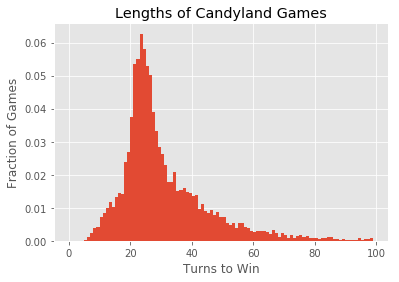

In [6]:
def runSimulation():
    simulation = []

    for trial in range(10000):
        count = playGame()
        simulation.append(count)

    plt.hist(simulation, bins = range(100), normed = True)
    plt.xlabel("Turns to Win")
    plt.ylabel('Fraction of Games')
    plt.title('Lengths of Candyland Games')
    
runSimulation()